# Análisis de Fourier
## Función periódica 
Def. Una función periódica  con periodo  es una función que cumple  para todo.

<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/167d2801f5e999a5477d4b497f6e35553c677d33/Clases/Imagenes/Fourier1.png?raw=true" width="500">
</center>
<center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/167d2801f5e999a5477d4b497f6e35553c677d33/Clases/Imagenes/Fourier2.png?raw=true" width="500">
</center><center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/167d2801f5e999a5477d4b497f6e35553c677d33/Clases/Imagenes/Fourier3.png?raw=true" width="500">
</center>




El término fundamental de este tipo de ecuaciones es de la forma
$$f (t) = A_0 + C_1cos(\omega_0t + \theta)$$

</center><center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/167d2801f5e999a5477d4b497f6e35553c677d33/Clases/Imagenes/Fourier4.png?raw=true" width="500">
</center>
https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/167d2801f5e999a5477d4b497f6e35553c677d33/Clases/Imagenes/Fourier5.png

El valor promedio por encima del eje de las abscisas $A_0$.
La amplitud de la oscialación $C_1$.
La frecuencia angula  que esta relacionada con la frecuencia y el periodo de la forma $\omega_0=2\pi f=2\pi\frac{1}{T}$.
La fase o el ángulo de desplazamiento $\theta$ que desplaza toda la curva sobre la horizontal.

La ecuación (1) también trae la información de una sinusoidal (ejercicio 1. Hint: usa el coseno de la suma de ángulos). De tal forma que podemos expresar esta ecuación de la forma 
$$f(t) = A_0 + A_1cos(\omega_0 t ) + B_1sen(\omega_0 t ) + e$$ 
que es posible linealizar con la forma $y = a_0z_0 + a_1z_1 + a_2z_2 + \cdot  \cdot  \cdot  + a_mz_m + e$ en un espacio de $m$ dimensiones y sobre la cual es posible aplicar mínimos cuadrados para ajustar una recta; donde $z_0=1$, $z_1=cos(\omega_0t)$, $z_2=sen(\omega_0t)$ y todas las demas $z_3=...=z_m=0$.
Los coeficientes son:
$A_0=\frac{\sum_i f(t_i)}{N}$
$A_1=\frac{2}{N}\sum_i f(t_i)cos(\omega_0t_i)$
$B_1=\frac{2}{N}\sum_i f(t_i)sen(\omega_0t_i)$
como esta función es peródica, entonces es posible tomar solamente $N$ puntos en el intervalo $\Delta t$ tal que el periodo de la función $T=(N-1)\Delta t$. Es decir, es suficiente estos $N-1$ puntos para poder describir la función por completo.
Ejemplo
Para la tabla de datos presentada, obtener los coeficientes de Fourier considerando que representan solo un periodo de la función.


In [1]:
import numpy as np
import pandas as pd

# Definir los datos de la tabla como vectores
t = np.array([0, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1.05, 1.20, 1.35])
y = np.array([2.200, 1.595, 1.031, 0.722, 0.786, 1.200, 1.805, 2.369, 2.678, 2.614])
y_cos = np.array([2.200, 1.291, 0.319, -0.223, -0.636, -1.200, -1.460, -0.732, 0.829, 2.114])
y_sen = np.array([0.000, 0.938, 0.980, 0.687, 0.462, 0.000, -1.061, -2.253, -2.547, -1.536])

# Crear una tabla con los datos
tabla_datos = pd.DataFrame({
    't': t,
    'y': y,
    'y_cos': y_cos,
    'y_sin': y_sen
})

# Mostrar la tabla
print("Tabla de datos:")
print(tabla_datos)

# Calcular las sumas (última fila de la tabla original)
sumatorias = pd.DataFrame({
    'Sum_t': [np.sum(t)],
    'Sum_y': [np.sum(y)],
    'Sum_y_cos': [np.sum(y_cos)],
    'Sum_y_sin': [np.sum(y_sen)]
})

print("\nSumatorias:")
print(sumatorias)

# Calcular coeficientes de Fourier (ejemplo para el primer armónico)
N = len(t)  # Número de muestras
T = (N - 1) * (t[1] - t[0])  # Periodo
omega0 = 2 * np.pi / T  # Frecuencia fundamental (ω0 ≈ 4.654 rad/s)

a0 = np.mean(y)
a1 = 2 * np.mean(y_cos)
b1 = 2 * np.mean(y_sen)

# Mostrar resultados
print("\nCoeficientes de Fourier (primer armónico):")
print(f"a0 = {a0:.4f}")
print(f"a1 = {a1:.4f}")
print(f"b1 = {b1:.4f}")

Tabla de datos:
      t      y  y_cos  y_sin
0  0.00  2.200  2.200  0.000
1  0.15  1.595  1.291  0.938
2  0.30  1.031  0.319  0.980
3  0.45  0.722 -0.223  0.687
4  0.60  0.786 -0.636  0.462
5  0.75  1.200 -1.200  0.000
6  0.90  1.805 -1.460 -1.061
7  1.05  2.369 -0.732 -2.253
8  1.20  2.678  0.829 -2.547
9  1.35  2.614  2.114 -1.536

Sumatorias:
   Sum_t  Sum_y  Sum_y_cos  Sum_y_sin
0   6.75   17.0      2.502      -4.33

Coeficientes de Fourier (primer armónico):
a0 = 1.7000
a1 = 0.5004
b1 = -0.8660



Este ajuste solo considera una única frecuencia de oscilación. Si el fenómeno se pudiese describir con $m$ múltiplos enteros de esta frecuencia entonces la ecuación general del modelo sería
$f (t) = A_0 + A_1cos(\omega_0 t) + B_1sen(\omega_0 t) + A_2cos(2\omega_0 t) + B_2sen(2\omega_0 t )+ \cdot  \cdot  \cdot  + A_mcos(m\omega_0 t) + B_msen(m\omega_0 t)$
donde los coeficientes se obtienen por medio de minimos cuadrados como

$A_0=\frac{\sum_i f(t_i)}{N}$

$A_j=\frac{2}{N}\sum_i f(t_i)cos(j\omega_0 t_i)$

$B_j=\frac{2}{N}\sum_i f(t_i)sen(j\omega_0 t_i)$

A los valores $j\omega_0$ donde $j=1,2,...,m$ se le conocen como los armónicos de la función ajustada.

In [2]:
import numpy as np
import pandas as pd

# Datos de la tabla
t = np.array([0, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1.05, 1.20, 1.35])
y = np.array([2.200, 1.595, 1.031, 0.722, 0.786, 1.200, 1.805, 2.369, 2.678, 2.614])

# Parámetros
N = len(t)          # Número de muestras
T = np.max(t)       # Periodo (T = 1.35)
omega0 = 2 * np.pi / T  # Frecuencia fundamental (ω0 ≈ 4.654 rad/s)

# Cálculo de términos para el segundo armónico
y_cos2 = y * np.cos(2 * omega0 * t)  # y * cos(2ω0t)
y_sin2 = y * np.sin(2 * omega0 * t)  # y * sin(2ω0t)

# Coeficientes del segundo armónico
a2 = 2 * np.mean(y_cos2)
b2 = 2 * np.mean(y_sin2)

# Mostrar resultados
print("Coeficientes del segundo armónico:")
print(f"a2 = {a2:.4f}")
print(f"b2 = {b2:.4f}")

# Opcional: Crear tabla para visualización
tabla_datos = pd.DataFrame({
    't': t,
    'y': y,
    'y_cos2': y_cos2,
    'y_sin2': y_sin2
})
print("\nTabla con términos del segundo armónico:")
print(tabla_datos)

# Sumatorias (verificación)
print(f"\nSum(y_cos2) = {np.sum(y_cos2):.4f}")
print(f"Sum(y_sin2) = {np.sum(y_sin2):.4f}")

Coeficientes del segundo armónico:
a2 = 0.5238
b2 = -0.0640

Tabla con términos del segundo armónico:
      t      y    y_cos2        y_sin2
0  0.00  2.200  2.200000  0.000000e+00
1  0.15  1.595  0.276969  1.570768e+00
2  0.30  1.031 -0.968823  3.526228e-01
3  0.45  0.722 -0.361000 -6.252703e-01
4  0.60  0.786  0.602111 -5.052311e-01
5  0.75  1.200  0.919253  7.713451e-01
6  0.90  1.805 -0.902500  1.563176e+00
7  1.05  2.369 -2.226132 -8.102457e-01
8  1.20  2.678  0.465030 -2.637315e+00
9  1.35  2.614  2.614000 -1.280491e-15

Sum(y_cos2) = 2.6189
Sum(y_sin2) = -0.3202


Graficando los ajustes

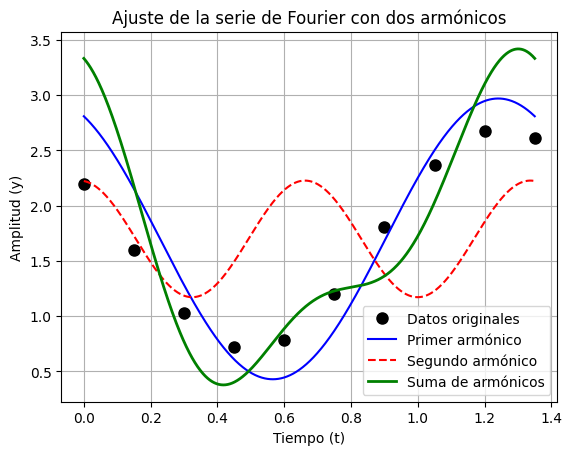

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de la tabla
t = np.array([0, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1.05, 1.20, 1.35])
y = np.array([2.200, 1.595, 1.031, 0.722, 0.786, 1.200, 1.805, 2.369, 2.678, 2.614])

# Parámetros
N = len(t)           # Número de muestras
T = np.max(t)        # Periodo (T = 1.35)
omega0 = 2 * np.pi / T  # Frecuencia fundamental (ω0 ≈ 4.654 rad/s)

# Cálculo de coeficientes del primer armónico
y_cos1 = y * np.cos(omega0 * t)
y_sin1 = y * np.sin(omega0 * t)
a0 = np.mean(y)
a1 = 2 * np.mean(y_cos1)
b1 = 2 * np.mean(y_sin1)

# Cálculo de coeficientes del segundo armónico
y_cos2 = y * np.cos(2 * omega0 * t)
y_sin2 = y * np.sin(2 * omega0 * t)
a2 = 2 * np.mean(y_cos2)
b2 = 2 * np.mean(y_sin2)

# Crear un vector de tiempo más denso para las curvas suaves
t_dense = np.linspace(0, T, 1000)

# Ajuste del primer armónico
y_fit1 = a0 + a1 * np.cos(omega0 * t_dense) + b1 * np.sin(omega0 * t_dense)

# Ajuste del segundo armónico
y_fit2 = a0 + a2 * np.cos(2 * omega0 * t_dense) + b2 * np.sin(2 * omega0 * t_dense)

# Suma de ambos armónicos
y_fit_total = (a0 + a1 * np.cos(omega0 * t_dense) + b1 * np.sin(omega0 * t_dense)
               + a2 * np.cos(2 * omega0 * t_dense) + b2 * np.sin(2 * omega0 * t_dense))

# Graficar los datos y los ajustes
plt.figure()
plt.grid(True)
plt.title('Ajuste de la serie de Fourier con dos armónicos')

# Datos originales
plt.plot(t, y, 'ko', markersize=8, label='Datos originales')

# Ajuste del primer armónico
plt.plot(t_dense, y_fit1, 'b-', linewidth=1.5, label='Primer armónico')

# Ajuste del segundo armónico
plt.plot(t_dense, y_fit2, 'r--', linewidth=1.5, label='Segundo armónico')

# Suma de ambos armónicos
plt.plot(t_dense, y_fit_total, 'g-', linewidth=2, label='Suma de armónicos')

# Configuración del gráfico
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud (y)')
plt.legend(loc='best')
plt.show()

Las series de Fourier no solo sirven para ajustar datos que pueden tener una periodicidad. También se ocupa para transformar funciones continuas  que parecen ser periodicas a funciones seno y coseno de la forma
$$f (t) = a_0 + \sum_{k=1}^{\infty}[a_kcos(k\omega_0 t ) + b_ksen(k\omega_0 t )]$$

donde de nuevo los valor $k$ definen los armónicos. En este caso la evaluación de cada coeficiente se realiza para $f(t)$ con el valor de $t$ para el intervalo correspondiente.
Para poder evaluar los coeficientes necesitamos en cálculo contínuo de las sumas, por lo que las coeficientes ahora son usando una integral en lugar de una suma sobre el periodo de tiempo:

$a_0=\frac{2}{T}\int_0^Tf(t)dt$
$a_k=\frac{2}{T}\int_0^Tf(t)cos(k\omega_0t)dt$
$b_k=\frac{2}{T}\int_0^Tf(t)sen(k\omega_0t)dt$

Ejemplo
Una ecuación de onda rectangular se puede describir como
$f(t)=\left\{\begin{array}{rr}-1&-T/2<t<-T/4\\
1&-T/4<t<-T/4\\
-1&-T/4<t<-T/2\\
 \end{array}\right. $
con altura de 2 unidades y periodo $T=2\pi/ \omega_0$.

</center><center>
  <img src="https://github.com/ArnaldoHC/Herramientas-Computacionales-Avanzadas/blob/167d2801f5e999a5477d4b497f6e35553c677d33/Clases/Imagenes/Fourier5.png?raw=true" width="500">
</center>


/tmp/ipykernel_161/682205817.py:32: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  a0 = (2 / T) * np.trapz(f, t)
/tmp/ipykernel_161/682205817.py:39: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  an[n - 1] = (2 / T) * np.trapz(f * np.cos(n * omega0 * t), t)
/tmp/ipykernel_161/682205817.py:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  bn[n - 1] = (2 / T) * np.trapz(f * np.sin(n * omega0 * t), t)


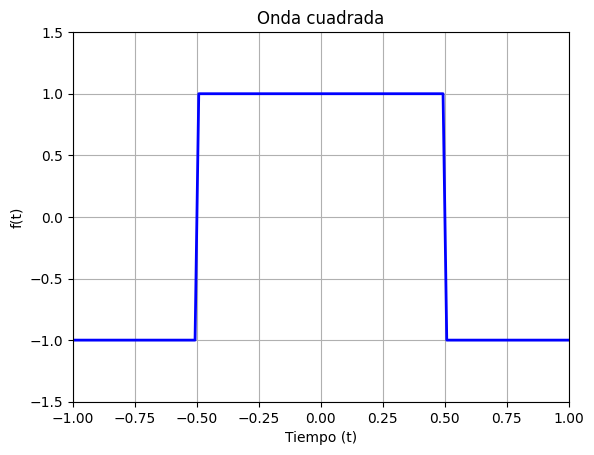

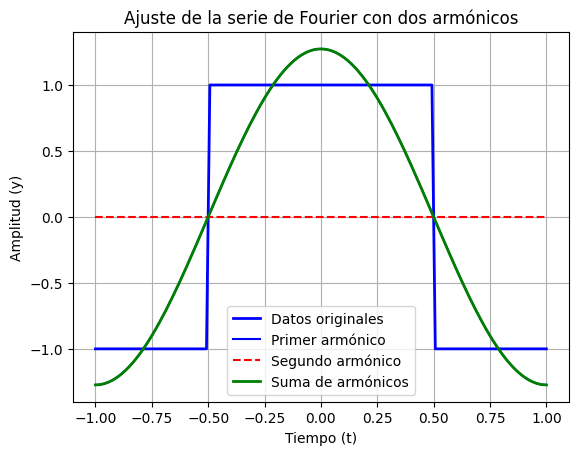

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el periodo T
T = 2  # Puedes ajustar T según necesites
omega0 = 2 * np.pi / T
N = 45  # número de datos
k = 2  # número de armónicos

# Crear un vector de tiempo para un periodo
t = np.linspace(-T / 2, T / 2, N * 3)

# Inicializar la función
f = np.zeros_like(t)

# Definir los intervalos
f[np.logical_and(t >= -T / 2, t < -T / 4)] = -1
f[np.logical_and(t >= -T / 4, t < T / 4)] = 1
f[np.logical_and(t >= T / 4, t <= T / 2)] = -1

# Graficar la onda cuadrada
plt.figure()
plt.plot(t, f, 'b-', linewidth=2)
plt.grid(True)
plt.xlabel('Tiempo (t)')
plt.ylabel('f(t)')
plt.title('Onda cuadrada')
plt.ylim([-1.5, 1.5])  # Ajustar los límites del eje y
plt.xlim([-T / 2, T / 2])  # Mostrar solo un periodo

# Calcular el coeficiente a0
a0 = (2 / T) * np.trapz(f, t)

# Calcular los coeficientes an y bn
an = np.zeros(k)
bn = np.zeros(k)

for n in range(1, k + 1):
    an[n - 1] = (2 / T) * np.trapz(f * np.cos(n * omega0 * t), t)
    bn[n - 1] = (2 / T) * np.trapz(f * np.sin(n * omega0 * t), t)

# Ajuste del primer armónico
y_fit1 = a0 + an[0] * np.cos(omega0 * t) + bn[0] * np.sin(omega0 * t)

# Ajuste del segundo armónico
y_fit2 = a0 + an[1] * np.cos(2 * omega0 * t) + bn[1] * np.sin(2 * omega0 * t)

# Suma de ambos armónicos
y_fit_total = (a0 + an[0] * np.cos(omega0 * t) + bn[0] * np.sin(omega0 * t) +
               an[1] * np.cos(2 * omega0 * t) + bn[1] * np.sin(2 * omega0 * t))

# Graficar los datos y los ajustes
plt.figure()
plt.grid(True)

# Datos originales
plt.plot(t, f, 'b-', linewidth=2, label='Datos originales')

# Ajuste del primer armónico
plt.plot(t, y_fit1, 'b-', linewidth=1.5, label='Primer armónico')

# Ajuste del segundo armónico
plt.plot(t, y_fit2, 'r--', linewidth=1.5, label='Segundo armónico')

# Suma de ambos armónicos
plt.plot(t, y_fit_total, 'g-', linewidth=2, label='Suma de armónicos')

# Configuración del gráfico
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud (y)')
plt.title('Ajuste de la serie de Fourier con dos armónicos')
plt.legend(loc='best')
plt.show()

# ___________________________________________________________

Las series de Fourier se pueden expresar usando la formaula de Euler 
$$e^{\,\pm \,i\, x}=\text{cos}\,(x)\pm i\,\text{sen}\,(x)$$
sustituyendo esta expresión en la serie de Fourier obtenemos que 
$$f(t)=\sum_{k=-\infty}^{\infty}c_ke^{ik\omega_0t}$$
y donde el coeficiente es
$$c_k=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)e^{-ik\omega_0t}dt$$